In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# Funcion para hacer pirámides de distribución comparando dos variables
def pyramid_plot(ylabels, data_left, xlabel_left, data_right, xlabel_right, fig=None, **kwargs):
    if(fig is None):
        fig = plt.figure()

    y_pos = np.arange(len(ylabels))
    
    maximos = ( data_left.max() , data_right.max() )
    maximo = (max(maximos) +9) //10*10
    
    ax1 = fig.add_subplot(121)
    plt.barh(y_pos, data_left, **kwargs)
    plt.yticks(y_pos, ylabels, ha='right')
    plt.axis(xmin=maximo, xmax=0)
    plt.xlabel(xlabel_left)

    ax2= fig.add_subplot(122)
    plt.barh(y_pos, data_right, **kwargs)
    plt.yticks(y_pos, ylabels)
    plt.axis(xmin= 0 , xmax=maximo)
    plt.xlabel(xlabel_right)
    ax2.yaxis.tick_right()


    return fig

In [3]:
# Leer datos demográficos de enero 2016 y noviembre 2018
demo201811 = pd.read_csv('201812_Rango_Edades_Seccion_201811.csv',encoding = 'iso-8859-1',delimiter = ';')
demo201601 = pd.read_csv('201812_Rango_Edades_Seccion_201601.csv',encoding = 'iso-8859-1',delimiter = ';')

# Juntar los dos ficheros añadiendo una columna de fecha
demo201811['fecha'] = '201811'
demo201601['fecha'] = '201601'

frames = [demo201601, demo201811]
demo = pd.concat(frames)

In [4]:
# Crear nuevos campos. Convertir primero NaN a 0
demo.fillna(0, inplace=True)
demo['Espanoles'] = demo['EspanolesHombres'] + demo['EspanolesMujeres']
demo['Extranjeros'] = demo['ExtranjerosHombres'] + demo['ExtranjerosMujeres']
demo['Hombres'] = demo['EspanolesHombres'] + demo['ExtranjerosHombres']
demo['Mujeres'] = demo['EspanolesMujeres'] + demo['ExtranjerosMujeres']
demo['Total'] = demo['Espanoles'] + demo['Extranjeros']

In [5]:
# Porcentaje de extranjeros y mujeres por distritos en 2018
distrito18 = demo[demo['fecha'] == '201811'].groupby(['DESC_DISTRITO']).agg('sum')
extranjeros18 = distrito18['Extranjeros']/distrito18['Total']*100
mujeres18 = distrito18['Mujeres']/distrito18['Total']*100
# Porcentaje de extranjeros y mujeres por distritos en 2016
distrito16 = demo[demo['fecha'] == '201601'].groupby(['DESC_DISTRITO']).agg('sum')
extranjeros16 = distrito16['Extranjeros']/distrito16['Total']*100
mujeres16 = distrito16['Mujeres']/distrito16['Total']*100

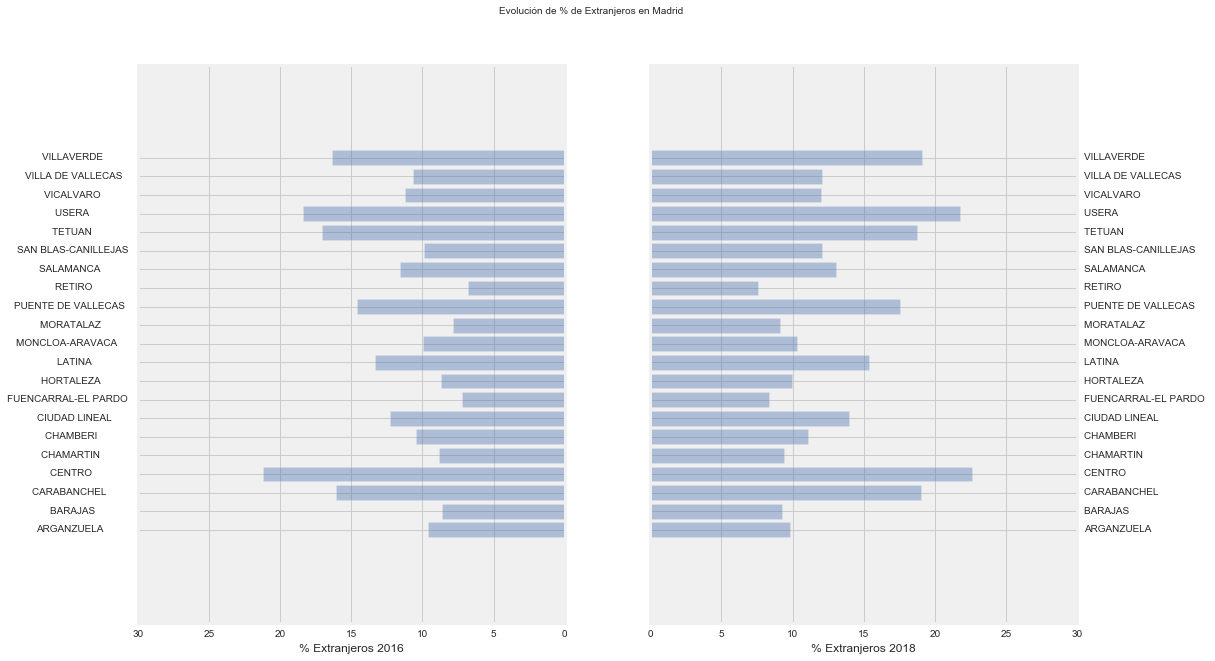

In [7]:
# Plot the data - % de extranjeros
pyrfig = plt.figure(figsize=(15,10))
pyrfig = pyramid_plot(extranjeros16.index, extranjeros16, '% Extranjeros 2016', extranjeros18, '% Extranjeros 2018', pyrfig, align='center', alpha=0.4)
pyrfig.suptitle('Evolución de % de Extranjeros en Madrid')
plt.savefig('images/evolextranjerosmadrid.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show(pyrfig)

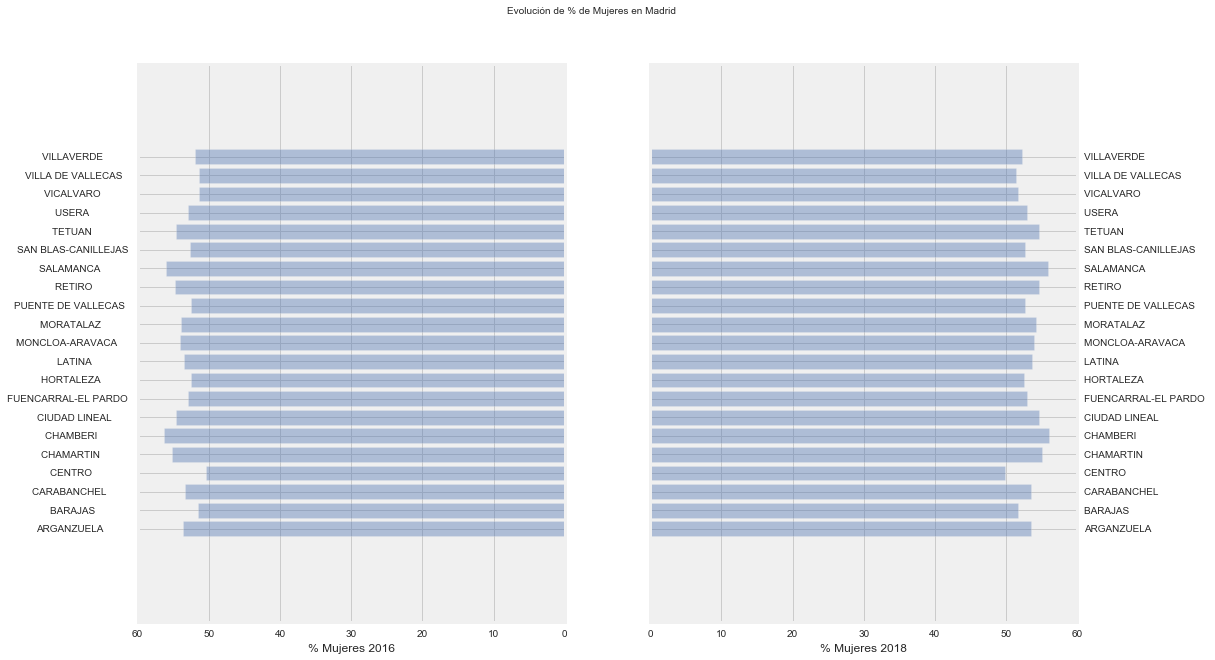

In [8]:
# Plot the data - % de mujeres
pyrfig = plt.figure(figsize=(15,10))
pyrfig = pyramid_plot(mujeres16.index, mujeres16, '% Mujeres 2016', mujeres18, '% Mujeres 2018', pyrfig, align='center', alpha=0.4)
pyrfig.suptitle('Evolución de % de Mujeres en Madrid')
plt.show(pyrfig)

In [9]:
# Porcentaje de extranjeros y mujeres por edades en 2018
edades18 = demo[demo['fecha'] == '201811'].groupby(['COD_EDAD_INT']).agg('sum')
extranjeros18 = edades18['Extranjeros']/edades18['Total']*100
mujeres18 = edades18['Mujeres']/edades18['Total']*100
# Porcentaje de extranjeros y mujeres por edades en 2016
edades16 = demo[demo['fecha'] == '201601'].groupby(['COD_EDAD_INT']).agg('sum')
extranjeros16 = edades16['Extranjeros']/edades16['Total']*100
mujeres16 = edades16['Mujeres']/edades16['Total']*100

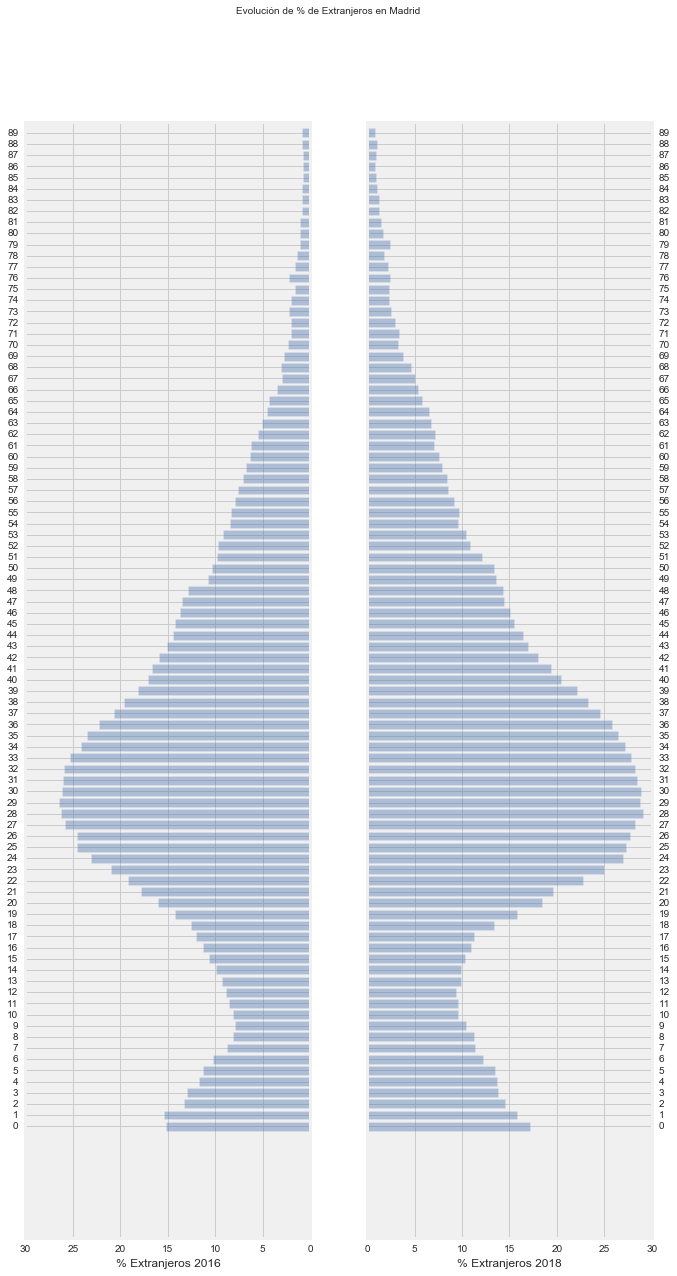

In [10]:
# Plot the data - % de extranjeros
pyrfig = plt.figure(figsize=(10,20))
pyrfig = pyramid_plot(extranjeros16.index[:90], extranjeros16[:90], '% Extranjeros 2016', extranjeros18[:90], '% Extranjeros 2018', pyrfig, align='center', alpha=0.4)
pyrfig.suptitle('Evolución de % de Extranjeros en Madrid')
plt.savefig('images/evolextranjerosmadrid2.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show(pyrfig)

In [11]:
# Porcentaje de extranjeros por edades en 2018 en distrito centro
edades18centro = demo[((demo['fecha'] == '201811') & (demo['COD_DISTRITO'] == 1))].groupby(['COD_EDAD_INT']).agg('sum')
extranjeros18centro = edades18centro['Extranjeros']/edades18centro['Total']*100
# Porcentaje de extranjeros por edades en 2016
edades16centro = demo[(demo['fecha'] == '201601') & (demo['COD_DISTRITO'] == 1)].groupby(['COD_EDAD_INT']).agg('sum')
extranjeros16centro = edades16centro['Extranjeros']/edades16centro['Total']*100

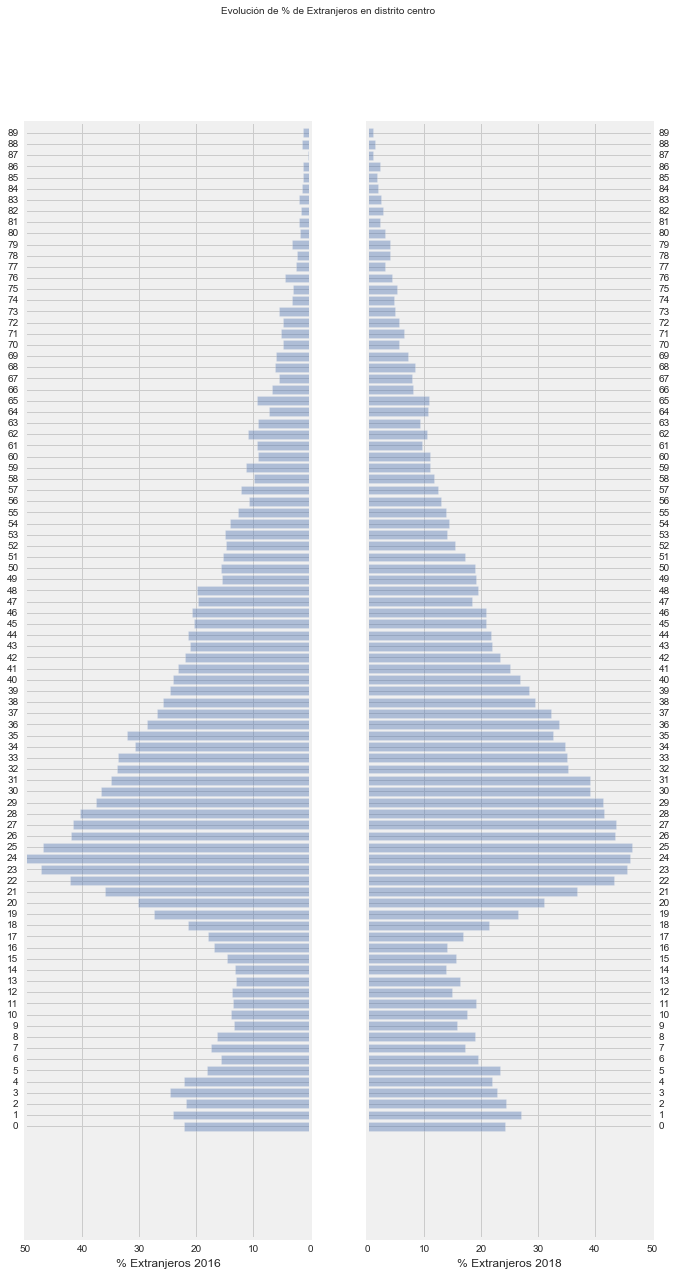

In [12]:
# Plot the data - % de extranjeros en distrito centro 
pyrfig = plt.figure(figsize=(10,20))
pyrfig = pyramid_plot(extranjeros16centro.index[:90], extranjeros16centro[:90], '% Extranjeros 2016', extranjeros18centro[:90], '% Extranjeros 2018', pyrfig, align='center', alpha=0.4)
pyrfig.suptitle('Evolución de % de Extranjeros en distrito centro')
plt.savefig('images/evolextranjeroscentro.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show(pyrfig)

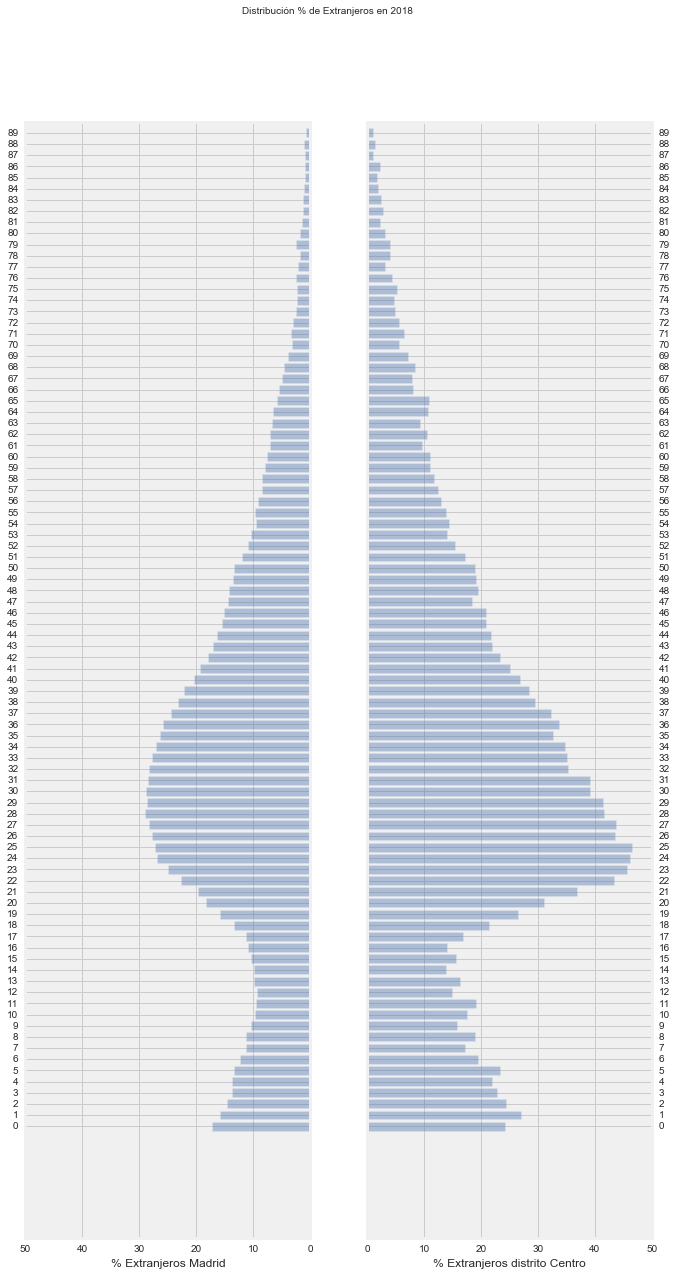

In [14]:
# Plot the data - % de extranjeros EN 2018 - Comparación de Madrid con distrito centro 
pyrfig = plt.figure(figsize=(10,20))
pyrfig = pyramid_plot(extranjeros18centro.index[:90], extranjeros18[:90], '% Extranjeros Madrid', extranjeros18centro[:90], '% Extranjeros distrito Centro', pyrfig, align='center', alpha=0.4)
pyrfig.suptitle('Distribución % de Extranjeros en 2018')
plt.savefig('images/evolextranjerosmadcen.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show(pyrfig)